In [1]:
import librosa
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
y, sr = librosa.load("../Samples/Piano/PN_ab-ba_piano.mp3", mono=False)

In [3]:
y = librosa.core.to_mono(y)
y = librosa.resample(y, sr, 8000)
y = y[np.argwhere(y >= 0.001)[0][0]:]

In [4]:
note_table = pd.read_csv("../Utilities/Note_table.tsv", header=0, sep="\t")

In [7]:
def long_file_to_data(file, rs, note_table):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, rs)
    y = y[np.argwhere(y >= 0.001)[0][0]:]

    df = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Freq", "Note"])
    notes = list(note_table.iloc[37:72]["Note"])

    for i in tqdm(range(0, 16000*35, 16000), total = 35, leave = False):
        df = df.append(pd.DataFrame({**{"x{}".format(j): [y[j+i]] for j in range(16000)}, 
                                    **{"Freq": [librosa.note_to_hz(notes[int(i/16000)])],
                                      "Note": [notes[int(i/16000)]]}}))
    return df

In [6]:
test = long_file_to_data("../Samples/Piano/PN_ab-ba_piano.mp3", 8000, note_table)
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15992,x15993,x15994,x15995,x15996,x15997,x15998,x15999,Freq,Note
0,0.001465,0.001681,0.005331,-0.002838,-0.015286,-0.009736,0.015490,0.010337,0.001405,0.002371,...,0.003488,0.001495,-0.001752,-0.002831,-0.002337,-0.002936,-0.005293,-0.007221,138.591315,C#3
0,-0.008995,-0.013210,-0.014460,-0.016820,-0.016346,-0.013873,-0.015907,-0.014268,-0.007894,-0.003954,...,-0.021490,-0.023198,-0.019781,-0.015293,-0.012494,-0.012988,-0.014049,-0.012630,146.832384,D3
0,-0.009459,-0.008396,-0.008832,-0.012935,-0.010718,-0.002320,-0.002686,-0.000303,0.002634,0.000839,...,-0.001041,-0.000368,0.002192,0.005376,0.007840,0.006027,0.003115,0.003368,155.563492,D#3
0,0.009730,0.016409,0.019472,0.015838,0.014779,0.016792,0.015904,0.019331,0.021950,0.020994,...,-0.009846,-0.014612,-0.016278,-0.014461,-0.012089,-0.009292,-0.008961,-0.012282,164.813778,E3
0,-0.016608,-0.018866,-0.018244,-0.014823,-0.010421,-0.010667,-0.005970,-0.000487,-0.005703,-0.009161,...,-0.017786,-0.018655,-0.018373,-0.018204,-0.018803,-0.017219,-0.015150,-0.011934,174.614116,F3


In [8]:
def dir_to_data(directory, rs, note_table):
    data = pd.DataFrame(columns=["x{}".format(i) for i in range(16000)]+["Freq", "Note"])
    pbar = tqdm(os.listdir(directory))
    
    for file in pbar:
        pbar.set_description("Processing %s" % file)
        df = long_file_to_data(directory + file, rs, note_table)
        data = data.append(df)
        
    data = data.reset_index().drop("index", axis=1)
    return data

In [9]:
data = dir_to_data("../Samples/Piano/", 8000, note_table)

In [10]:
data.sample(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15992,x15993,x15994,x15995,x15996,x15997,x15998,x15999,Freq,Note
454,-0.001518,-0.000073,0.000967,0.000750,-0.011523,-0.013985,-0.006740,-0.014535,-0.015739,-0.008548,...,-0.000233,-0.000562,-0.000790,-0.000849,-0.001058,-0.001141,-0.001220,-0.000619,987.766603,B5
627,0.008955,0.008659,0.004075,-0.000044,0.010740,0.030237,0.032356,0.024585,0.021640,0.011586,...,-0.013797,-0.010566,-0.004219,0.006336,0.013959,0.022246,0.024227,0.014691,880.000000,A5
68,-0.001030,0.000970,0.000898,0.002767,0.000395,0.002585,0.005665,0.004855,-0.009341,-0.015881,...,-0.001390,-0.000393,0.001560,0.002413,0.002488,0.002946,0.002877,0.002185,932.327523,A#5
210,0.004597,-0.000471,-0.000078,-0.001410,-0.000679,0.009749,0.008255,0.005261,0.001069,-0.001669,...,-0.000931,0.001803,0.000210,-0.005868,-0.013043,-0.018671,-0.016300,-0.013097,138.591315,C#3
422,-0.013485,-0.014930,-0.018205,-0.022209,-0.028268,-0.032563,-0.029401,-0.022914,-0.017538,-0.010760,...,0.010625,0.010590,0.012063,0.014085,0.014440,0.013940,0.014798,0.016646,155.563492,D#3


In [11]:
data.shape

(700, 16002)

In [12]:
data.drop("Note", axis=1).to_csv("data_freq.tsv", index=False, sep="\t")

In [13]:
data.drop("Freq", axis=1).to_csv("data_note.tsv", index=False, sep="\t")

In [2]:
data = pd.read_csv("data_freq.tsv", sep="\t", header=0)

In [5]:
data.drop("Freq", axis=1).iloc[0].values

array([ 0.0014648 ,  0.00168076,  0.00533115, ..., -0.00293616,
       -0.0052928 , -0.00722118])

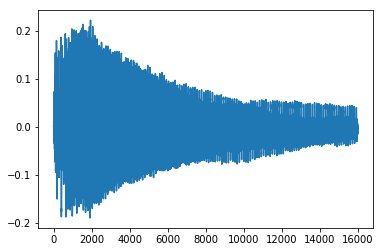

In [7]:
plt.plot(data.drop("Freq", axis=1).iloc[0].values)